In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read csv
df = pd.read_csv("clean_data/renewable_nonrenewable_breakdown_emissions.csv")
df.head(5)

,Unnamed: 0,1965.0_renewable,1966.0_renewable,1967.0_renewable,1968.0_renewable,1969.0_renewable,1970.0_renewable,1971.0_renewable,1972.0_renewable,1973.0_renewable,...,2010.0_co2_emission,2011.0_co2_emission,2012.0_co2_emission,2013.0_co2_emission,2014.0_co2_emission,2015.0_co2_emission,2016.0_co2_emission,2017.0_co2_emission,2018.0_co2_emission,2019.0_co2_emission
0,Canada,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,530.094931,541.020754,526.312965,544.096067,553.458312,546.233373,537.777358,549.107572,565.635679,556.188552
1,Mexico,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001610,...,442.611064,465.846905,473.972290,472.839136,459.630951,463.121335,468.791476,476.945856,466.575628,454.972919
2,US,0.133322,0.14062,0.140736,0.15546,0.162271,0.162359,0.165844,0.186730,0.199897,...,5485.715925,5336.435925,5089.974540,5249.595898,5254.565096,5141.406746,5042.431426,4983.869718,5116.785715,4964.693088
3,Total North America,0.133322,0.14062,0.140736,0.15546,0.162271,0.162359,0.165844,0.186730,0.201507,...,6458.421920,6343.303583,6090.259796,6266.531101,6267.654360,6150.761455,6049.000260,6009.923146,6148.997022,5975.854558
4,Argentina,0.000000,0.00000,0.000000,0.00000,0.000000,0.000475,0.000499,0.000644,0.000490,...,166.000124,168.746975,175.268259,182.764622,182.745499,186.021818,185.762130,182.807827,180.394930,174.877271


In [3]:
# Pull out the global data
df_world = df.iloc[[99]]
df_world

,Unnamed: 0,1965.0_renewable,1966.0_renewable,1967.0_renewable,1968.0_renewable,1969.0_renewable,1970.0_renewable,1971.0_renewable,1972.0_renewable,1973.0_renewable,...,2010.0_co2_emission,2011.0_co2_emission,2012.0_co2_emission,2013.0_co2_emission,2014.0_co2_emission,2015.0_co2_emission,2016.0_co2_emission,2017.0_co2_emission,2018.0_co2_emission,2019.0_co2_emission
99,Total World,0.214179,0.233071,0.235538,0.257519,0.269545,0.298667,0.32276,0.347499,0.368311,...,31085.534841,31973.369818,32273.531532,32795.554106,32804.718691,32787.197673,32936.066036,33279.491334,34007.891035,34169.000782


In [4]:
# Pull out data by suffix
renewable_world = df_world.filter(regex='_renewable$',axis=1).head()

In [5]:
# Create a function to drop suffix
def drop_suffix(self, suffix):
    self.columns = self.columns.str.rstrip(suffix)
    return self

pd.core.frame.DataFrame.drop_suffix = drop_suffix

In [6]:
# Drop suffix
renewable_world.drop_suffix('_renewable')

,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
99,0.214179,0.233071,0.235538,0.257519,0.269545,0.298667,0.32276,0.347499,0.368311,0.385606,...,9.699337,11.120646,12.60451,14.360242,16.027352,18.081068,20.057078,23.036529,25.825912,28.976463


In [7]:
# Flip the df
renewable_worldT = renewable_world.T
renewable_worldT = renewable_worldT.reset_index(drop=False)

In [8]:
# Rename columns
renewable_worldT = renewable_worldT.rename(columns={"index":"year", 99: "renewable"})
renewable_worldT.set_index("year", inplace=True)

In [9]:
# Pull out data by suffix
oil_world = df_world.filter(regex='_oil$',axis=1).head()
oil_world.drop_suffix('_oil')
# Flip the df
oil_worldT = oil_world.T
oil_worldT = oil_worldT.reset_index(drop=False)
# Rename columns
oil_worldT = oil_worldT.rename(columns={"index":"year", 99: "oil"})
oil_worldT.set_index("year", inplace=True)

gas_world = df_world.filter(regex='_gas$',axis=1).head()
gas_world.drop_suffix('_gas')
# Flip the df
gas_worldT = gas_world.T
gas_worldT = gas_worldT.reset_index(drop=False)
# Rename columns
gas_worldT = gas_worldT.rename(columns={"index":"year", 99: "gas"})
gas_worldT.set_index("year", inplace=True)

coal_world = df_world.filter(regex='_coal$',axis=1).head()
coal_world.drop_suffix('_coal')
# Flip the df
coal_worldT = coal_world.T
coal_worldT = coal_worldT.reset_index(drop=False)
# Rename columns
coal_worldT = coal_worldT.rename(columns={"index":"year", 99: "coal"})
coal_worldT.set_index("year", inplace=True)

nuclear_world = df_world.filter(regex='_nuclear$',axis=1).head()
nuclear_world.drop_suffix('_nuclear')
# Flip the df
nuclear_worldT = nuclear_world.T
nuclear_worldT = nuclear_worldT.reset_index(drop=False)
# Rename columns
nuclear_worldT = nuclear_worldT.rename(columns={"index":"year", 99: "nuclear"})
nuclear_worldT.set_index("year", inplace=True)

hydroelec_world = df_world.filter(regex='_hydroelec$',axis=1).head()
hydroelec_world.drop_suffix('_hydroelec')
# Flip the df
hydroelec_worldT = hydroelec_world.T
hydroelec_worldT = hydroelec_worldT.reset_index(drop=False)
# Rename columns
hydroelec_worldT = hydroelec_worldT.rename(columns={"index":"year", 99: "hydroelec"})
hydroelec_worldT.set_index("year", inplace=True)

emission_world = df_world.filter(regex='_co2_emission$',axis=1).head()
emission_world.drop_suffix('_co2_emission')
# Flip the df
emission_worldT = emission_world.T
emission_worldT = emission_worldT.reset_index(drop=False)
# Rename columns
emission_worldT = emission_worldT.rename(columns={"index":"year", 99: "emission"})
emission_worldT.set_index("year", inplace=True)

In [10]:
# Combine them
combine1 = pd.concat([renewable_worldT, oil_worldT], axis=1)
combine2 = pd.concat([combine1, gas_worldT], axis=1)
combine3 = pd.concat([combine2, coal_worldT], axis=1)
combine4 = pd.concat([combine3, nuclear_worldT], axis=1)
combine5 = pd.concat([combine4, hydroelec_worldT], axis=1)
combine_all = pd.concat([combine5, emission_worldT], axis=1)

In [11]:
# check df
combine_all = combine_all.reset_index(drop=False)
combine_all

,year,renewable,oil,gas,coal,nuclear,hydroelec,emission
0,1965.0,0.214179,65.191064,22.693676,58.104642,0.255397,9.231979,11207.741166
1,1966.0,0.233071,70.187240,24.727660,58.766738,0.344333,9.838170,11725.313885
2,1967.0,0.235538,75.206029,26.546542,57.818915,0.410060,10.057427,12084.725642
3,1968.0,0.257519,81.631612,28.959593,58.684128,0.521132,10.592890,12743.051213
4,1969.0,0.269545,88.476713,31.800305,60.475449,0.617834,11.217432,13530.939823
5,1970.0,0.298667,96.148951,34.613250,61.410989,0.788747,11.746476,14312.868023
6,1971.0,0.322760,101.537356,37.051894,61.077453,1.097042,12.270650,14788.378466
7,1972.0,0.347499,109.360591,39.100893,61.755597,1.521751,12.846304,15495.494674
8,1973.0,0.368311,117.886008,40.956192,63.604258,2.039016,13.030095,16345.050954
9,1974.0,0.385606,116.180700,41.962491,63.655384,2.666001,14.312650,16255.751893


In [12]:
col = combine_all['year'] 
col_split =[x.split('.') for x in col]
split_df = pd.DataFrame(col_split)

In [13]:
combine_all[['years']]=split_df.iloc[:,0]
combine_all[['years']]=pd.to_numeric(combine_all['years'])

In [14]:
combine_all

,year,renewable,oil,gas,coal,nuclear,hydroelec,emission,years
0,1965.0,0.214179,65.191064,22.693676,58.104642,0.255397,9.231979,11207.741166,1965
1,1966.0,0.233071,70.187240,24.727660,58.766738,0.344333,9.838170,11725.313885,1966
2,1967.0,0.235538,75.206029,26.546542,57.818915,0.410060,10.057427,12084.725642,1967
3,1968.0,0.257519,81.631612,28.959593,58.684128,0.521132,10.592890,12743.051213,1968
4,1969.0,0.269545,88.476713,31.800305,60.475449,0.617834,11.217432,13530.939823,1969
5,1970.0,0.298667,96.148951,34.613250,61.410989,0.788747,11.746476,14312.868023,1970
6,1971.0,0.322760,101.537356,37.051894,61.077453,1.097042,12.270650,14788.378466,1971
7,1972.0,0.347499,109.360591,39.100893,61.755597,1.521751,12.846304,15495.494674,1972
8,1973.0,0.368311,117.886008,40.956192,63.604258,2.039016,13.030095,16345.050954,1973
9,1974.0,0.385606,116.180700,41.962491,63.655384,2.666001,14.312650,16255.751893,1974


## Building models for years vs each energy types

In [15]:
# Assign X (data) and y (target)
X = combine_all["years"].values.reshape(-1, 1)
y = combine_all[["renewable", "oil", "gas", "coal", "nuclear", "hydroelec"]]

print(X.shape, y.shape)

(55, 1) (55, 6)


In [16]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [18]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

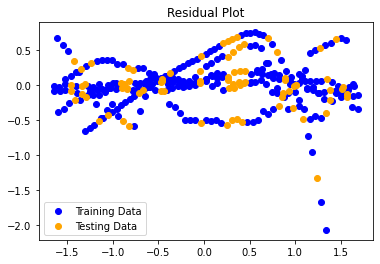

In [19]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [20]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
models = []

from sklearn.metrics import mean_squared_error

lr_predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, lr_predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "LinearRegression",
            "MSE": MSE,
            "R2":r2})

MSE: 0.11825828713676985, R2: 0.8653954929280837


In [21]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01)
lasso.fit(X_train_scaled, y_train_scaled)

las_predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, las_predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Lasso",
            "MSE": MSE,
            "R2":r2})

MSE: 0.11820794021026215, R2: 0.8654887378915365


In [22]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01)
elasticnet.fit(X_train_scaled, y_train_scaled)

ela_predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, ela_predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "ElasticNet",
            "MSE": MSE,
            "R2":r2})

MSE: 0.11821574955956786, R2: 0.8654782051438739


In [23]:
a = pd.DataFrame(models)
a

,model,MSE,R2
0,LinearRegression,0.118258,0.865395
1,Lasso,0.118208,0.865489
2,ElasticNet,0.118216,0.865478


In [24]:
a[a["R2"]==a["R2"].max()]

,model,MSE,R2
1,Lasso,0.118208,0.865489


In [25]:
a[a["MSE"]==a["MSE"].min()]

,model,MSE,R2
1,Lasso,0.118208,0.865489


### Lasso Model gives the smallest MSE score and highest R2 score
We will use the lasso model for each energy type prediction based on year

In [26]:
new_years = [2020, 2030, 2040, 2050]

In [27]:
year_df = pd.DataFrame(new_years, columns = ['year'])
year_df

,year
0,2020
1,2030
2,2040
3,2050


In [28]:
# Assign X (data) and y (target)
new_X = year_df["year"].values.reshape(-1, 1)

In [29]:
# Create a StandardScaler model for the new_X

new_X_scaled = X_scaler.transform(new_X)

In [30]:
# Prediction
energy_predictions = lasso.predict(new_X_scaled)

In [31]:
energy_predictions

array([[1.36627417, 1.69206183, 1.73074947, 1.6804601 , 1.59966025,
        1.73469359],
       [1.84793575, 2.28857546, 2.3409019 , 2.27288369, 2.16359895,
        2.34623647],
       [2.32959732, 2.88508909, 2.95105434, 2.86530729, 2.72753764,
        2.95777935],
       [2.8112589 , 3.48160272, 3.56120677, 3.45773088, 3.29147634,
        3.56932224]])

In [32]:
y_new_inverse = y_scaler.inverse_transform(energy_predictions)
y_new_inverse

array([[ 14.51755289, 193.90867726, 131.86856926, 159.75362729,
         31.69570966,  36.8867826 ],
       [ 17.9443513 , 213.25118925, 152.07793482, 180.54014886,
         37.22480758,  41.90737903],
       [ 21.37114971, 232.59370124, 172.28730038, 201.32667043,
         42.75390549,  46.92797545],
       [ 24.79794811, 251.93621324, 192.49666594, 222.113192  ,
         48.28300341,  51.94857188]])

In [33]:
energy_prediction_df = pd.DataFrame(y_new_inverse, columns=["renewable",
                                    "oil", "gas", "coal", 'nuclear', 'hydroelec'])
energy_prediction_df 

,renewable,oil,gas,coal,nuclear,hydroelec
0,14.517553,193.908677,131.868569,159.753627,31.695710,36.886783
1,17.944351,213.251189,152.077935,180.540149,37.224808,41.907379
2,21.371150,232.593701,172.287300,201.326670,42.753905,46.927975
3,24.797948,251.936213,192.496666,222.113192,48.283003,51.948572


## Building models for years vs each nonrenewable energy types
#### Since the renewable is a exponential, this model doesn't predict the output correctly
#### Will rerun model with the nonrenewable energy types only then build another model for renewable

In [34]:
# Assign X (data) and y (target)
X = combine_all["years"].values.reshape(-1, 1)
y = combine_all[["oil", "gas", "coal", "nuclear", "hydroelec"]]

print(X.shape, y.shape)

(55, 1) (55, 5)


In [35]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [37]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

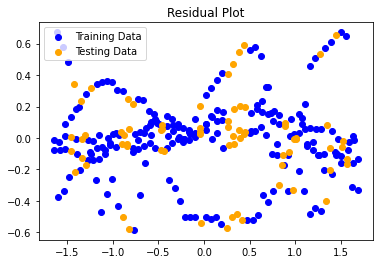

In [38]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [39]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
models = []

from sklearn.metrics import mean_squared_error

lr_predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, lr_predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "LinearRegression",
            "MSE": MSE,
            "R2":r2})

MSE: 0.07078316921060057, R2: 0.9235437304586774


In [40]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01)
lasso.fit(X_train_scaled, y_train_scaled)

las_predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, las_predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Lasso",
            "MSE": MSE,
            "R2":r2})

MSE: 0.07088468418214225, R2: 0.9234619511493808


In [41]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01)
elasticnet.fit(X_train_scaled, y_train_scaled)

ela_predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, ela_predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "ElasticNet",
            "MSE": MSE,
            "R2":r2})

MSE: 0.07087772670134307, R2: 0.9234688413252892


In [42]:
a = pd.DataFrame(models)
a

,model,MSE,R2
0,LinearRegression,0.070783,0.923544
1,Lasso,0.070885,0.923462
2,ElasticNet,0.070878,0.923469


In [43]:
a[a["R2"]==a["R2"].max()]

,model,MSE,R2
0,LinearRegression,0.070783,0.923544


In [44]:
a[a["MSE"]==a["MSE"].min()]

,model,MSE,R2
0,LinearRegression,0.070783,0.923544


### Linear Regression model gives the smallest MSE score and highest R2 score for the nonrenewable energy types, so we will use that to predict the nonrenewable energy types

In [50]:
new_years = [2020, 2030, 2040, 2050]
year_df = pd.DataFrame(new_years, columns = ['year'])

In [51]:
# Assign X (data) and y (target)
nonre_X = year_df["year"].values.reshape(-1, 1)

In [52]:
# Create a StandardScaler model for the new_X

nonre_X_scaled = X_scaler.transform(nonre_X)

In [53]:
# Prediction
nonrenewable_energy_predictions = model.predict(nonre_X_scaled)

#### The below predictions are different than the previous one

In [54]:
y_inverse = y_scaler.inverse_transform(nonrenewable_energy_predictions)

nonrenewable_energy_prediction_df = pd.DataFrame(y_inverse , columns=["oil", "gas", "coal", 'nuclear', 'hydroelec'])
nonrenewable_energy_prediction_df 

,oil,gas,coal,nuclear,hydroelec
0,194.480139,132.452295,160.371991,31.868499,37.031467
1,214.024112,152.867445,181.376509,37.458512,42.103071
2,233.568085,173.282596,202.381026,43.048524,47.174674
3,253.112058,193.697746,223.385543,48.638536,52.246277


## Building models for years vs Renewable

In [82]:
# Assign X (data) and y (target)
renew_X = combine_all["years"].values.reshape(-1, 1)
renew_y = np.log(combine_all[["renewable"]])

print(renew_X.shape, renew_y.shape)

(55, 1) (55, 1)


In [83]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [84]:
# transform the exponential Y data to make it a straight line
# ln_Y = np.log(renew_y)

In [85]:
# model.fit(renew_X, ln_Y)
model.fit(renew_X, renew_y)

LinearRegression()

In [86]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.08783093]]
y-axis intercept:  [-174.36295839]


In [87]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[renew_X.min()]])
x_max = np.array([[renew_X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1965]]
Max X Value: [[2019]]


In [88]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
# y_min = model.predict(x_min)
# y_max = model.predict(x_max)
y_min = model.predict(x_min)
y_max = model.predict(x_max)

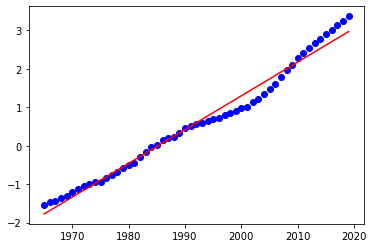

In [89]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(renew_X, renew_y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [93]:
# Predict future years
y_2030 = model.predict([[2030]])
y_2030

array([[3.93382241]])

In [98]:
# pip install statsmodels

     |████████████████████████████████| 9.5 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 4.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [121]:
import statsmodels.api as sm

In [132]:
year_renew = combine_all[["years", "renewable"]].copy()

In [133]:
year_renew['logRenewable'] = np.log(combine_all["renewable"])

In [134]:
year_renew

,years,renewable,logRenewable
0,1965,0.214179,-1.540942
1,1966,0.233071,-1.456411
2,1967,0.235538,-1.445884
3,1968,0.257519,-1.356661
4,1969,0.269545,-1.311019
5,1970,0.298667,-1.208427
6,1971,0.322760,-1.130848
7,1972,0.347499,-1.056992
8,1973,0.368311,-0.998829
9,1974,0.385606,-0.952938


In [135]:
test_X = year_renew["years"]
test_X = sm.add_constant(test_X, has_constant='add')

In [136]:
test_y = year_renew.logRenewable

In [137]:
mod = sm.OLS(test_y, test_X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           logRenewable   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2760.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           2.15e-47
Time:                        21:49:25   Log-Likelihood:                 12.376
No. Observations:                  55   AIC:                            -20.75
Df Residuals:                      53   BIC:                            -16.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -174.3630      3.330    -52.354      0.0

In [139]:
# -174.3630
# 0.0878
# y = -174.3630 + 0.0878x
xa = np.exp(-174.3630)
xb = np.exp(0.0878)
print("xa", xa)
print("xb", xb)

xa 1.8841316799865746e-76
xb 1.0917697462420983


In [140]:
def linear_predictions(t):
    return xa * xb ** t

In [143]:
# prediction_2030 = xa * xb ** 2019
# prediction_2030
year_renew['predictions'] = year_renew.years.apply(linear_predictions)
year_renew

,years,renewable,logRenewable,Predictions,predictions
0,1965,0.214179,-1.540942,0.159454,0.159454
1,1966,0.233071,-1.456411,0.174087,0.174087
2,1967,0.235538,-1.445884,0.190063,0.190063
3,1968,0.257519,-1.356661,0.207505,0.207505
4,1969,0.269545,-1.311019,0.226548,0.226548
5,1970,0.298667,-1.208427,0.247338,0.247338
6,1971,0.322760,-1.130848,0.270036,0.270036
7,1972,0.347499,-1.056992,0.294817,0.294817
8,1973,0.368311,-0.998829,0.321872,0.321872
9,1974,0.385606,-0.952938,0.351411,0.351411


Text(0, 0.5, 'Renewable Energy Consumption')

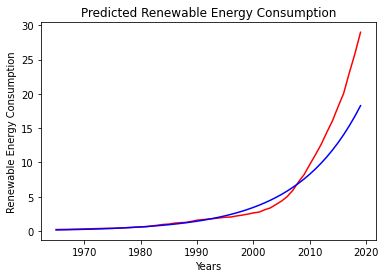

In [145]:
plt.plot(year_renew.years, year_renew.renewable, 'red')
plt.plot(year_renew.years, year_renew.predictions, 'blue')
plt.title('Predicted Renewable Energy Consumption')
plt.xlabel('Years')
plt.ylabel('Renewable Energy Consumption')

In [160]:
years_addon = [2020, 2030, 2040, 2050]
new_data = {"years":years_addon,
           "predictions": years_addon}
years_addon_df = pd.DataFrame(new_data, columns=["years", 'predictions'])
years_addon_df["predictions"] = years_addon_df.apply(linear_predictions)
years_addon_df

,years,predictions
0,2020,19.945429
1,2030,47.990352
2,2040,115.468758
3,2050,277.827384


Text(0, 0.5, 'Renewable Energy Consumption')

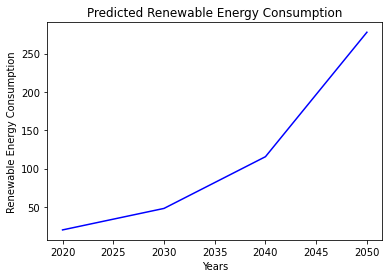

In [161]:
plt.plot(years_addon_df.years, years_addon_df.predictions, 'blue')
plt.title('Predicted Renewable Energy Consumption')
plt.xlabel('Years')
plt.ylabel('Renewable Energy Consumption')

## Building models for emission vs  each energy types

In [ ]:
# Assign X (data) and y (target)
X = combine_all[["renewable", "oil", "gas", "coal", "nuclear", "hydroelec"]]
y = combine_all["emission"].values.reshape(-1, 1)
print(X.shape, y.shape)

In [29]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [31]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

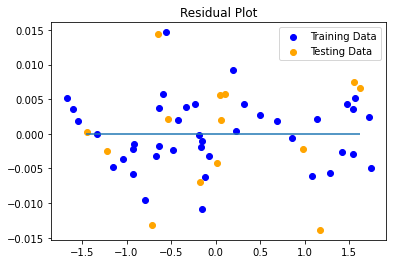

In [32]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [33]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
models = []

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "LinearRegression",
            "MSE": MSE,
            "R2":r2})

MSE: 5.8812200958706034e-05, R2: 0.999932452768974


In [34]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01)
lasso.fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Lasso",
            "MSE": MSE,
            "R2":r2})

MSE: 0.0001418315535902677, R2: 0.9998371030405091


In [35]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01)
ridge.fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Ridge",
            "MSE": MSE,
            "R2":r2})

MSE: 7.234372489283037e-05, R2: 0.9999169114874301


In [36]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01)
elasticnet.fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "ElasticNet",
            "MSE": MSE,
            "R2":r2})

MSE: 0.0003882535711827816, R2: 0.9995540814109682


In [37]:
a = pd.DataFrame(models)
a

,model,MSE,R2
0,LinearRegression,0.000059,0.999932
1,Lasso,0.000142,0.999837
2,Ridge,0.000072,0.999917
3,ElasticNet,0.000388,0.999554


In [38]:
a[a["R2"]==a["R2"].max()]

,model,MSE,R2
0,LinearRegression,0.000059,0.999932


In [39]:
a[a["MSE"]==a["MSE"].min()]

,model,MSE,R2
0,LinearRegression,0.000059,0.999932


### Linear Regression Model gives the smallest MSE score and highest R2 score
We will use the linear regression model for prediction